# Analysis of inequality and energy-related CO2 emissions in Latin America and the Caribbean applying a Kaya factors decomposition methodology

### Milton Cataño Valderrama

Inequality analysis by Kaya factors decomposition applying the Theil index

In [11]:
# Cargar los datos

import pandas as pd 
import numpy as np
df = pd.read_excel("dataset.xlsx")

### Cálculo de factores de Kaya

## <center> $\frac{CO_{2i}}{P_i} = \frac{CO_{2i}}{E_i} \cdot \frac{E_i}{GDP_i} \cdot \frac{GDP_i}{P_i}$ </center>

In [12]:
# Calcular los factores de Kaya

def co2pop(fila):
    resultado = (fila["co2_emissions"]*1000)/fila["pop"]
    return resultado

df["CO2-POP"] = df.apply(co2pop, axis=1)

def co2tes(fila):
    resultado = (fila["co2_emissions"]*1000)/fila["tes"]
    return resultado

df["CO2-TES"] = df.apply(co2tes, axis=1)

def tesgdp(fila):
    resultado = fila["tes"]/(fila["gdp_ppp"]/1000000)
    return resultado

df["TES-GDP"] = df.apply(tesgdp, axis=1)

def gdppop(fila):
    resultado = (fila["gdp_ppp"]/1000000)/fila["pop"]
    return resultado

df["GDP-POP"] = df.apply(gdppop, axis=1)

### Cálculo de los porcentajes de población

## <center>$p_i = \frac{P_{i_t}}{\sum \limits_{j=1}^{i} P_{j_t}}$</center>

In [13]:
# Calcular los porcentajes de población

totalpop = df.groupby("year").sum()

def popshare(fila):
    resultado = fila["pop"]/(totalpop.loc[fila["year"], "pop"])
    return resultado

df["popshare"] = df.apply(popshare, axis=1)

### Cálculo de los vectores hipotéticos

## <center> $c_{i}^{a} = a_{i} \cdot \bar{b} \cdot \bar{y}$</center>
## <center> $c_{i}^{b} = \bar{a} \cdot b_{i} \cdot \bar{y}$</center>
## <center> $c_{i}^{y} = \bar{a} \cdot \bar{b} \cdot y_{i}$</center>

In [14]:
# Calcular vectores hipotéticos

medias = df.groupby("year").mean()

def ci_a(fila):
    resultado = fila["CO2-TES"]*(medias.loc[fila["year"], "TES-GDP"])*(medias.loc[fila["year"], "GDP-POP"])
    return resultado

df["ci_a"] = df.apply(ci_a, axis=1)

def ci_b(fila):
    resultado = (medias.loc[fila["year"], "CO2-TES"])*fila["TES-GDP"]*(medias.loc[fila["year"], "GDP-POP"])
    return resultado

df["ci_b"] = df.apply(ci_b, axis=1)

def ci_y(fila):
    resultado = (medias.loc[fila["year"], "CO2-TES"])*(medias.loc[fila["year"], "TES-GDP"])*fila["GDP-POP"]
    return resultado

df["ci_y"] = df.apply(ci_y, axis=1)

### Cálculo de contribuciones a desigualdad de cada factor 

## <center>$ T^{a} = \sum_{i} p_{i}\ln{\frac{\bar{c}^{a}}{c_{i}^{a}}} $</center>
## <center>$ T^{b} = \sum_{i} p_{i}\ln{\frac{\bar{c}^{b}}{c_{i}^{b}}} $</center>
## <center>$ T^{y} = \sum_{i} p_{i}\ln{\frac{\bar{c}^{y}}{c_{i}^{y}}} $</center>

In [15]:
# Calcular contribuciones a desigualdad de cada factor

medias = df.groupby("year").mean()

def T_a(fila):
    resultado = fila["popshare"]*np.log(medias.loc[fila["year"], "ci_a"]/fila["ci_a"])
    return resultado

df["T_a"] = df.apply(T_a, axis=1)

def T_b(fila):
    resultado = fila["popshare"]*np.log(medias.loc[fila["year"], "ci_b"]/fila["ci_b"])
    return resultado

df["T_b"] = df.apply(T_b, axis=1)

def T_y(fila):
    resultado = fila["popshare"]*np.log(medias.loc[fila["year"], "ci_y"]/fila["ci_y"])
    return resultado

df["T_y"] = df.apply(T_y, axis=1)

### Cálculo de las medias ponderadas por porcentaje de población 

## <center> $ m(a;w) = \frac{\sum_{i} p_{i} \cdot a_{i}}{\sum_{i} p_{i}} $ </center>
## <center> $ m(by;w) = \frac{\sum_{i} p_{i} \cdot b_{i} \cdot y_{i}}{\sum_{i} p_{i}} $ </center>
## <center> $ m(b;w) = \frac{\sum_{i} p_{i} \cdot b_{i}}{\sum_{i} p_{i}} $ </center>
## <center> $ m(y;w) = \frac{\sum_{i} p_{i} \cdot y_{i}}{\sum_{i} p_{i}} $ </center>

In [16]:
# Calculo de las medias ponderadas por porcentaje de población

totalpopshare = df.groupby("year").sum()

def m_a_w(fila):
    aw = fila["CO2-TES"]*fila["popshare"]
    resultado = aw/totalpopshare.loc[fila["year"], "popshare"]
    return resultado

df["m_a_w"] = df.apply(m_a_w, axis=1)

def m_by_w(fila):
    byw = fila["TES-GDP"]*fila["GDP-POP"]*fila["popshare"]
    resultado = byw/totalpopshare.loc[fila["year"], "popshare"]
    return resultado

df["m_by_w"] = df.apply(m_by_w, axis=1)

def m_b_w(fila):
    bw = fila["TES-GDP"]*fila["popshare"]
    resultado = bw/totalpopshare.loc[fila["year"], "popshare"]
    return resultado

df["m_b_w"] = df.apply(m_b_w, axis=1)

def m_y_w(fila):
    yw = fila["GDP-POP"]*fila["popshare"]
    resultado = yw/totalpopshare.loc[fila["year"], "popshare"]
    return resultado

df["m_y_w"] = df.apply(m_y_w, axis=1)

# Cálculo de contribución a covarianzas ponderadas

## <center> $ cov(a,by;w) = \frac{\sum_{i} p_{i}(a_{i} - m(a;p))(b_{i} \cdot y_{i} - m(by;w))}{\sum_{i} p_{i}} = \sigma_{a,by}$ </center>
## <center> $ cov(b,y;w) = \frac{\sum_{i} p_{i}(b_{i} - m(b;p))(y_{i} - m(y;w))}{\sum_{i} p_{i}} = \sigma_{b,y}$ </center>

In [17]:
# Calculo de contribución a covarianzas ponderadas 

totalmeans = df.groupby("year").sum()

def cov_a_by_w(fila):
    resultado = fila["popshare"]*(fila["CO2-TES"] - totalmeans.loc[fila["year"], "m_a_w"])*(fila["TES-GDP"]*fila["GDP-POP"] - totalmeans.loc[fila["year"], "m_by_w"])
    return resultado

df["cov_a_by_w"] = df.apply(cov_a_by_w, axis=1)

def cov_b_y_w(fila):
    resultado = fila["popshare"]*(fila["TES-GDP"] - totalmeans.loc[fila["year"], "m_b_w"])*(fila["GDP-POP"] - totalmeans.loc[fila["year"], "m_y_w"])
    return resultado

df["cov_b_y_w"] = df.apply(cov_b_y_w, axis=1)

### Cálculo de términos de interacción 

## <center> $ inter_{a,by} = \ln{(1 + \frac{\sigma_{a,by}}{\bar{c}^{a}})} $ </center>
## <center> $ inter_{b,y} = \ln{(1 + \frac{a\cdot \sigma_{b,y}}{\bar{c}^{b}})} $ </center>


In [18]:
# Calculo de términos de interacción

df_covs = df.groupby("year").sum()

def inter_a_by(cov_a_by_w, ci_a_m):
    resultado = np.log(1 + (cov_a_by_w/ci_a_m))
    return resultado

inter_a_by = inter_a_by(df_covs["cov_a_by_w"], medias["ci_a"])

def inter_b_y(cov_b_y_w, ci_b_m, a):
    resultado = np.log(1 + ((a * cov_b_y_w)/ci_b_m))
    return resultado

inter_b_y = inter_b_y(df_covs["cov_b_y_w"], medias["ci_b"], medias["CO2-TES"])

## Cálculo del índice de Theil

## <center> $ T(c,p) = T^{A} + T^{B} + T^{Y} $ </center>
## <center> $ T^{A} = T^{a} + \frac{1}{2} inter_{a,by}$ </center>
## <center> $ T^{B} = T^{b} + \frac{1}{4} inter_{a,by} + \frac{1}{2} inter_{b,y}$ </center>
## <center> $ T^{Y} = T^{y} + \frac{1}{4} inter_{a,by} + \frac{1}{2} inter_{b,y}$ </center>

In [36]:
# Calculo de índice de Theil por año

def T_A(T_a, inter_a_by):
    resultado = T_a + (1/2)*inter_a_by
    return resultado

def T_B(T_b, inter_a_by, inter_b_y):
    resultado = T_b + (1/4)*inter_a_by + (1/2)*inter_b_y
    return resultado

def T_Y(T_y, inter_a_by, inter_b_y):
    resultado = T_y + (1/4)*inter_a_by + (1/2)*inter_b_y
    return resultado

T_A = T_A(df_covs["T_a"], inter_a_by)
T_B = T_B(df_covs["T_b"], inter_a_by, inter_b_y)
T_Y = T_Y(df_covs["T_y"], inter_a_by, inter_b_y)
T_c_p = T_A + T_B + T_Y

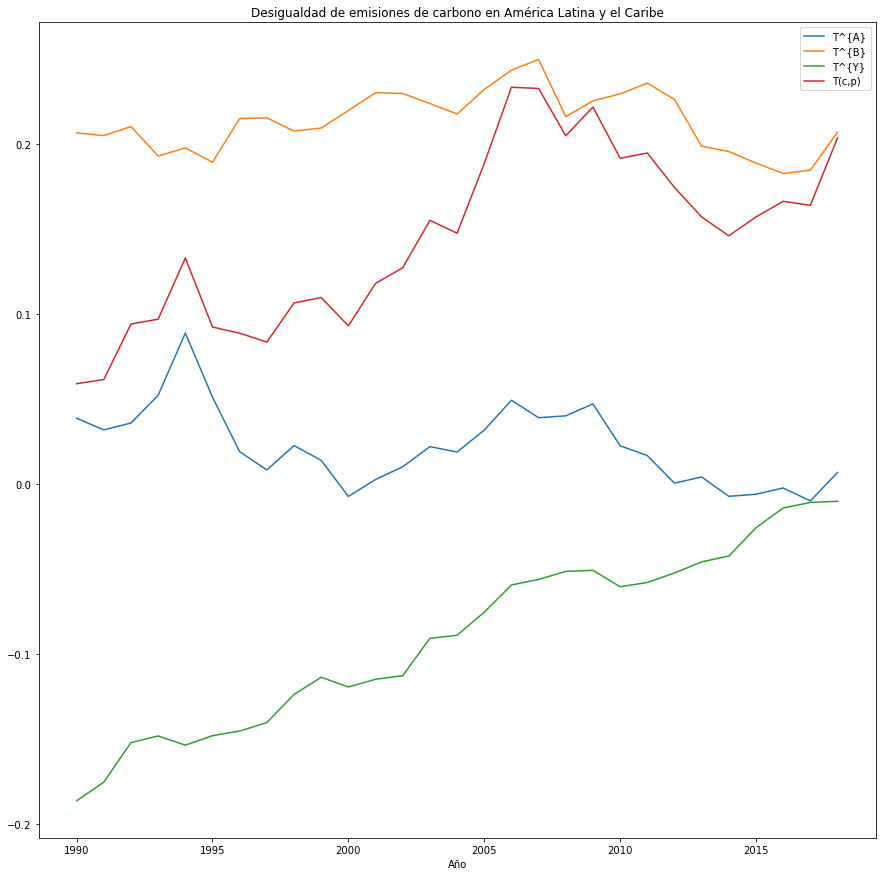

,"T(c,p)",T_a,T_b,T_y,T_a,T_b
year,,,,,,
1990,0.059005,0.012307,0.190909,-0.201726,0.052742,0.004773
1991,0.061412,0.003947,0.188571,-0.191487,0.055778,0.004603
1992,0.094065,0.014616,0.199282,-0.162853,0.042528,0.000492
1993,0.096936,0.029654,0.182542,-0.158357,0.045052,-0.001956
1994,0.132908,0.064319,0.187702,-0.163420,0.048915,-0.004608
1995,0.092300,0.033210,0.181909,-0.155179,0.035655,-0.003295
1996,0.088708,0.000361,0.208379,-0.151670,0.037346,-0.005708
1997,0.083464,-0.007333,0.211710,-0.143791,0.031324,-0.008447
1998,0.106424,0.002868,0.203841,-0.127316,0.039447,-0.012416


In [20]:
# Graficas

import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(15, 15)

T_A.plot(label= 'T^{A}')
T_B.plot(label= 'T^{B}')
T_Y.plot(label= 'T^{Y}')
T_c_p.plot(label= 'T(c,p)')
plt.legend()
plt.title('Desigualdad de emisiones de carbono en América Latina y el Caribe')
plt.xlabel('Año')
plt.show()

desigualdades = pd.concat([T_c_p, df_covs["T_a"], df_covs["T_b"], df_covs["T_y"], inter_a_by, inter_b_y], axis=1)
desigualdades.rename(columns={0:"T(c,p)" , 1:"T_a" , 2:"T_b" , 3:"T_y", 4:"inter_a_by", 5:"inter_b_y"})